Created on Tue Sep 10 16:15:23 2019

@author: Jane

Data source: https://github.com/numenta/NAB/tree/master/data/artificialWithAnomaly
    NAB > data > artificialWithAnomaly > (4 data source- multivariate with shared timestamp):
        1. art_daily_flatmiddle.csv
        2. art_daily_jumpsdown.csv
        3. art_daily_jumpsup.csv
        4. art_daily_nojump.csv
Anomaly log: https://github.com/numenta/NAB/blob/master/labels/combined_labels.json 
    time of anomaly: 2014-04-11 00:00:00   

#Purpose:  
        
        1.Explore the linearity of the features(#=4) on the projected subspaces (d=2,3)  
        2. Explore the suspicious score on each point of x with respect to top PC (eigenvector) 

# 0. Environment Setting and Data Input (with Anomalies)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

work_dir = 'C:\\Users\\Jane\\OneDrive - nctu.edu.tw\\Data Science Analysis Templates\\Anomaly Detection\\Subspace-based Anomaly Detection'

os.chdir(work_dir)
os.getcwd()

'C:\\Users\\Jane\\OneDrive - nctu.edu.tw\\Data Science Analysis Templates\\Anomaly Detection\\Subspace-based Anomaly Detection'

In [2]:
## input data sets iteratively into df
data_dir = "https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly"
sets = ["art_daily_flatmiddle.csv", "art_daily_jumpsdown.csv", "art_daily_jumpsup.csv", "art_daily_nojump.csv"]

df = pd.DataFrame()
for set in sets: 
    df_temp = pd.read_csv(data_dir+"/"+set,index_col = 0)
    #df_temp.info() #check if index column is datetime type, if not, run the follwoing line
    df_temp.index = pd.to_datetime(df_temp.index)
    df_temp.columns = [set[10:-4]]
    df = pd.concat([df,df_temp],axis=1)

del df_temp

In [3]:
df.head(10)

,flatmiddle,jumpsdown,jumpsup,nojump
timestamp,,,,
2014-04-01 00:00:00,-21.048383,18.090486,19.761252,21.598011
2014-04-01 00:05:00,-20.295477,20.359843,20.500833,19.321392
2014-04-01 00:10:00,-18.127229,21.105470,19.961641,21.399938
2014-04-01 00:15:00,-20.171665,21.151585,21.490266,18.373916
2014-04-01 00:20:00,-21.223762,18.137141,20.187739,18.167499
2014-04-01 00:25:00,-19.104491,21.625661,19.923126,20.016181
2014-04-01 00:30:00,-21.589446,21.673807,21.698404,18.238649
2014-04-01 00:35:00,-18.945042,20.245561,20.878758,19.569959
2014-04-01 00:40:00,-18.305893,19.928333,18.446200,21.587112


In [4]:
print(df.shape)

(4032, 4)


## 0.1 Record Anomalies (Normal=0/Anomaly=1) of df 

In [5]:
#Record classification (Normal=0/Anomaly=1) of df
Label = pd.DataFrame(np.zeros(df.shape[0]),index = df.index, columns = ["TrueAnomaly"])
Label.loc["2014-04-11","TrueAnomaly"] = 1
Label["2014-04-10":"2014-04-11"]

,TrueAnomaly
timestamp,
2014-04-10 00:00:00,0.0
2014-04-10 00:05:00,0.0
2014-04-10 00:10:00,0.0
2014-04-10 00:15:00,0.0
2014-04-10 00:20:00,0.0
2014-04-10 00:25:00,0.0
2014-04-10 00:30:00,0.0
2014-04-10 00:35:00,0.0
2014-04-10 00:40:00,0.0


In [6]:
print(Label.shape)

(4032, 1)


## 0.1 Data Visualization

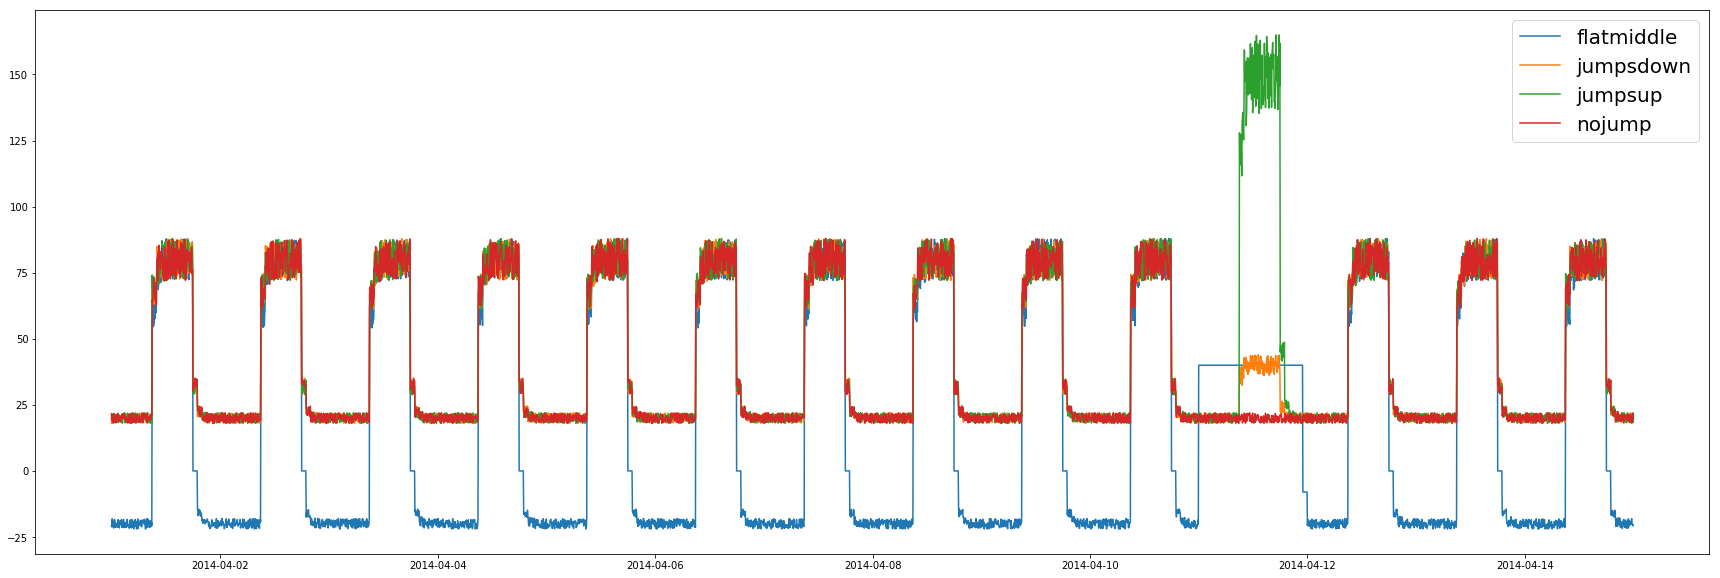

In [7]:
## Time series plot
plt.figure(figsize=[30,10])
for i in range(4):
    plt.plot(df.iloc[:,i],label = df.columns[i])
plt.legend(prop={'size': 20})
#plt.savefig("plot_artificialWithAnomaly_art_daily.png")

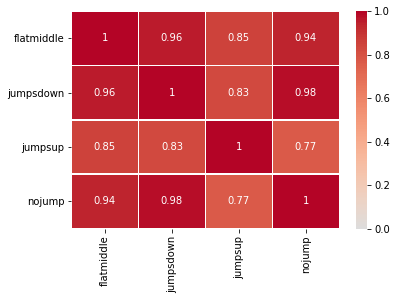

In [8]:
#Correlation heatmap
import seaborn as sns

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(df.corr(), vmax=1, vmin=0, center=0,
            cmap='coolwarm',
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

# 1. Exploration on Pair-wise features

- Goal: 
    
    To visualize the change of suspicious scores on each data point (with a fixed forgetting factor beta); the contours of suspicious scores are expected to change accordance to the correlation of features (i.e.,%{variance explained})
  
  Here I'd like to explore the relationships of feature 'nojump' with the rest features:  
    - 1st step - explore the scatter plot of 'nojump' with each of the rest features (draw the regression line) 
    - 2nd step - Use PCA to explore the behavior of data in the projected subspace (Q: is it linear in the subspace?)
    - 3rd step - apply osPCA.LS to the data (d=2) with a fixed forgetting factor beta, and derive the top PC-- u
    - 4th step - calculate and visualize the suspicious scores of each data point

## 1.1 Relationship of 'nojump' with 'jumpsdown' (r=0.98)

### 1.1.1 Scatter plot with regression line (original & standardized data)

In [9]:
df1 = df[['nojump','jumpsdown']]; df1.head()

,nojump,jumpsdown
timestamp,,
2014-04-01 00:00:00,21.598011,18.090486
2014-04-01 00:05:00,19.321392,20.359843
2014-04-01 00:10:00,21.399938,21.105470
2014-04-01 00:15:00,18.373916,21.151585
2014-04-01 00:20:00,18.167499,18.137141


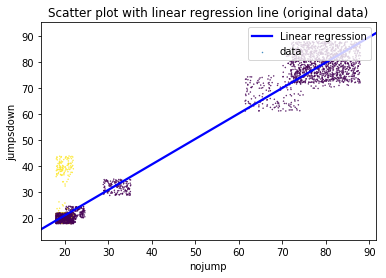

In [10]:
# Scatter plot of original 2D data

plt.scatter(df['nojump'], df['jumpsdown'],c=Label['TrueAnomaly'], s=0.2, label = 'data')

# Plot in blue a linear regression of order 1
sns.regplot(x='nojump', y='jumpsdown', data=df, scatter = None, color='blue', label ='Linear regression')

# Add a legend and display the plot
plt.legend(loc = 'upper right')
plt.title('Scatter plot with linear regression line (original data)')
plt.show()


Notice that the yellow dots are anomalies!

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = sc.fit_transform(df1)  #df1 is now np.array

df1 = pd.DataFrame(df1,index = df.index, columns = ["nojump","jumpsdown"]);df1.head()

,nojump,jumpsdown
timestamp,,
2014-04-01 00:00:00,-0.695449,-0.851343
2014-04-01 00:05:00,-0.777824,-0.768847
2014-04-01 00:10:00,-0.702616,-0.741742
2014-04-01 00:15:00,-0.812106,-0.740066
2014-04-01 00:20:00,-0.819575,-0.849647


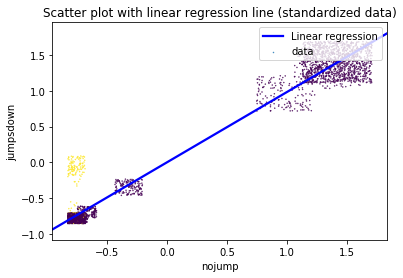

In [12]:
# Scatter plot of original 2D data

plt.scatter(df1['nojump'], df1['jumpsdown'],c=Label['TrueAnomaly'], s=0.2, label = 'data')

# Plot in blue a linear regression of order 1
sns.regplot(x='nojump', y='jumpsdown', data=df1, scatter = None, color='blue', label ='Linear regression')

# Add a legend and display the plot
plt.legend(loc = 'upper right')
plt.title('Scatter plot with linear regression line (standardized data)')
plt.show()

### 1.1.2 PCA: explore the behavior of the data in the subspace

In [13]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #extract all eigenvectors  
df1_1 = pca.fit_transform(df1)
#X_new = pca.transform(X_new)
explained_var = pca.explained_variance_ratio_ 

for i in range(2):
    print('The % of variance explained for PC_{} is {:.4f}'.format(i+1, float(explained_var[i])))

The % of variance explained for PC_1 is 0.9915
The % of variance explained for PC_2 is 0.0085


In [14]:
eigenvectors = pca.components_
for i in range(2):
    print("PC_{}=: {}".format(i+1,eigenvectors[i,:]))

PC_1=: [0.70710678 0.70710678]
PC_2=: [-0.70710678  0.70710678]


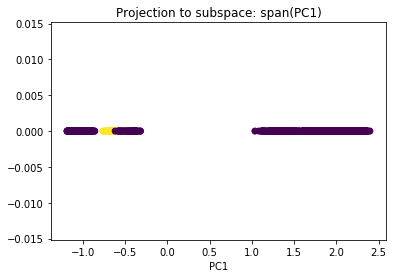

In [15]:
#Visualize of projection to subspace of span(PC1)
plt.scatter( df1_1[:,0],np.zeros(len(df1_1)), c=Label['TrueAnomaly'] )
plt.xlabel('PC1')
plt.title('Projection to subspace: span(PC1)')
plt.show()

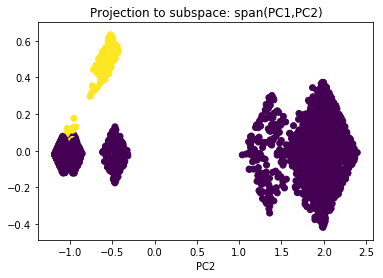

In [16]:
#Visualize of projection to subspace of span(PC1)
plt.scatter( df1_1[:,0],df1_1[:,1], c=Label['TrueAnomaly'])
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Projection to subspace: span(PC1,PC2)')
plt.show()

### 1.1.3 Appy osPCA to derive top PC (PC1)-- u

In [17]:
from osPCA_LeastSquared import Track_w, Track_w_ls, OD_onlinePCA
ratio = 0.1
n = df1.shape[0];print("n = {}".format(n))
beta = 1/(n*ratio);print("beta = {}".format(beta))
s_index, s_score, u, d = OD_onlinePCA(df1,beta)   
#Remember that input data must be mean-centered, and yes, df1 is already standardized
#Note: d(i+1) = beta*d(i) + y**2   (i.e. d is iteratively accumulated from i=1~n; d(0)==0.0001)

n = 4032
beta = 0.00248015873015873
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000


In [18]:
print("The approximated PC_1 by osPCA is {}".format(u.T))
print("The L-2 norm error of PC_1's between the PCA-derived and teh osPCA-derived is :\n {}".format(np.linalg.norm(eigenvectors[0,:]-u.T)))

The approximated PC_1 by osPCA is [[0.70708625 0.70712731]]
The L-2 norm error of PC_1's between the PCA-derived and teh osPCA-derived is :
 2.9028398959927866e-05


In [24]:
print("The accumulated sum of y(i)**2 from i=1~n is [Notice: only here that beta==1]:\n {}".format(d.flatten()))

The accumulated sum of y(i)**2 from i=1~n is [Notice: only here that beta==1]:
 [7994.70027393]


### 1.1.4 Calculate & Visualize the suspicious scores of each data point

    I then want to define a function "s_score" to calculate the suspicious score of a new instance x given the current top PC- u and the oversampling parameter (i.e., forgetting factor) - beta.

In [102]:
# define a function s_score(x_row, u, beta) -> suspicious_score
def s_score(x, u, d, beta, A_m, n):
    x = np.array(x).reshape((1,-1))
    A_m = np.array(A_m).reshape((1,-1))
    ratio = 1/(n*beta) 

    temp_mu = (A_m + ratio*x)/(1+ratio)
    x = x - temp_mu
    w = Track_w(x, u, d, beta)[0]
    #w = Track_w_2(x, u, d, n, ratio)[0]
    w = w/np.linalg.norm(w,2)  #updated PC by oversampling new instance x
    s = 1-abs(np.dot(u.T,w)) # compute the absolute cosine similarity
    
    return s.flatten()

In [103]:
# Testing if function s_score is working
n = df.shape[0];print("n =", n)
A_m = df1.mean();print("\nMean of df =\n",A_m)  #if df is already standardized, then A_m =0
x = df1.iloc[0,:];print("\nx =\n",x)

print("\n The suspicious score of a given x compared with top PC-- u is:\n",s_score(x,u,d,beta,A_m,n))

## or more generaly
df1.apply(s_score, axis=1, u=u,d=d,beta=beta,A_m=A_m,n=n).head()

n = 4032

Mean of df =
 nojump       9.174760e-17
jumpsdown    1.856154e-16
dtype: float64

x =
 nojump      -0.695449
jumpsdown   -0.851343
Name: 2014-04-01 00:00:00, dtype: float64

 The suspicious score of a given x compared with top PC-- u is:
 [1.14494137e-05]


timestamp
2014-04-01 00:00:00     [1.144941367259289e-05]
2014-04-01 00:05:00     [3.835833140009015e-08]
2014-04-01 00:10:00     [6.355796202672792e-07]
2014-04-01 00:15:00    [2.4649049592539996e-06]
2014-04-01 00:20:00     [4.872049381710042e-07]
Freq: 5T, dtype: object

Now, it's time to visualize the suspicious scores of each data point on the scatter plot.

In [147]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
#X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = -3, stop = 3.01, step = 0.01),
                     np.arange(start = -3, stop = 3.01, step = 0.01))
temp = pd.DataFrame([X1.ravel(), X2.ravel()]).T
temp.columns = ["npjump","jumpsdown"]
print('Partial coordinates (meshgrid points) shown:\n')
temp.head()

Partial coordinates (meshgrid points) shown:



,npjump,jumpsdown
0,-3.00,-3.0
1,-2.99,-3.0
2,-2.98,-3.0
3,-2.97,-3.0
4,-2.96,-3.0


In [132]:
temp1=temp.apply(s_score, axis=1, u=u, d=d, beta=beta, A_m=A_m, n=n)
print("s_scores of the corresponding coordinates:\n",temp1.head())

s_scores of the corresponding coordinates:
 0     [7.741562946250724e-11]
1    [2.4628318806563243e-07]
2    [1.0021845169294608e-06]
3     [2.267022050750356e-06]
4     [4.040015526340923e-06]
dtype: object


The (partial) 1st row of s_scores of the (X1,X2)-coordinate [array([7.74156295e-11]) array([2.46283188e-07]) array([1.00218452e-06])
 array([2.26702205e-06]) array([4.04001553e-06])]


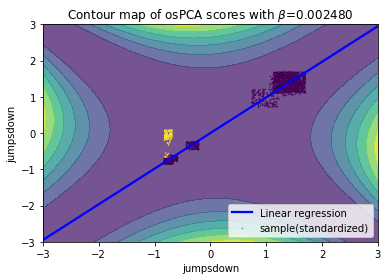

<Figure size 432x288 with 0 Axes>

In [172]:
#map s_score functions value to the contour map

temp2 = np.array(temp1).reshape(X1.shape)
print("The (partial) 1st row of s_scores of the (X1,X2)-coordinate",temp2[0,:5])

plt.contourf(X1, X2, temp2, alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#Add projected sample points
plt.scatter( df1.iloc[:,0],df1.iloc[:,1], c=Label['TrueAnomaly'],s=0.2,label='sample(standardized)')
# Plot in blue a linear regression of order 1
sns.regplot(x='nojump', y='jumpsdown', data=df1, scatter = None, color='blue', label ='Linear regression')


plt.xlabel('nojump')
plt.xlabel('jumpsdown')
plt.title(r'Contour map of osPCA scores with $\beta$={:.6f}'.format(beta))
plt.legend(loc="lower right")
plt.show()
#plt.savefig('Countour map of osPCA scores with beta_(2).jpg')